In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

Lecture du dataset

In [4]:
car = pd.read_csv('../data/dataset.csv')
car.head()


,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


Visualister les models de voitures les plus vendus

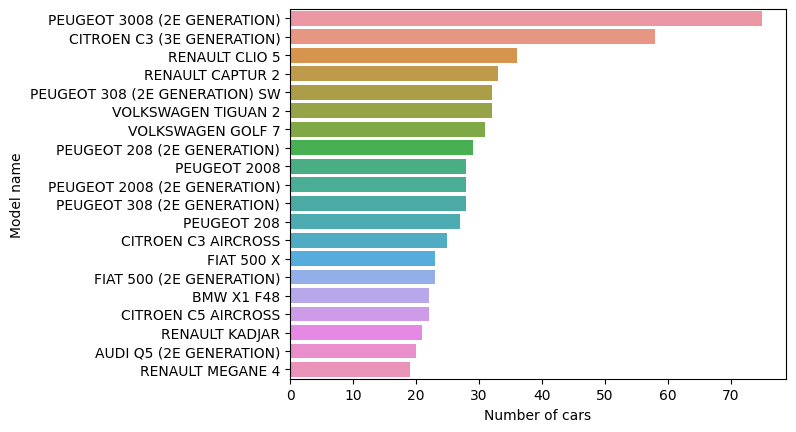

In [5]:
sns.barplot(y='index', x='carmodel', data=car['carmodel'].str.strip().value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Model name');

On a beaucoup de model mes les nombres par chaques model sont peu, donc on va regarder par marque

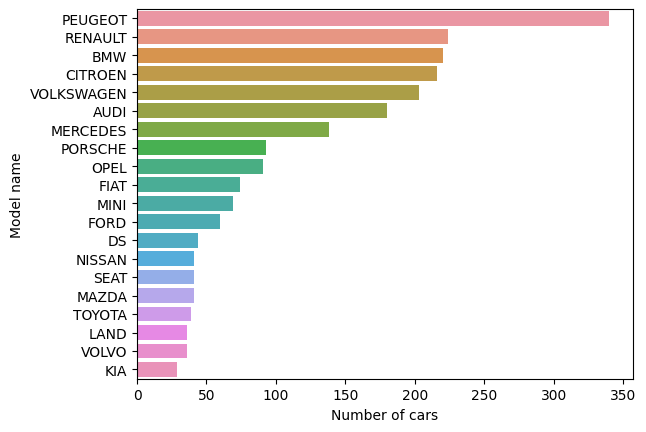

In [6]:
sns.barplot(y='index', x='carmodel', data=car['carmodel'].str.strip().str.split().str[0].value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Model name');

La c'est plus parlant et on peut dire que les français aiment bien les peugots.
Donc on rectifie la colone marque


In [7]:
car['carmodel'] = car['carmodel'].str.strip().str.split().str[0]


Maintenant regardant du coté des prix.

In [8]:
car['price'] = car['price'].str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')


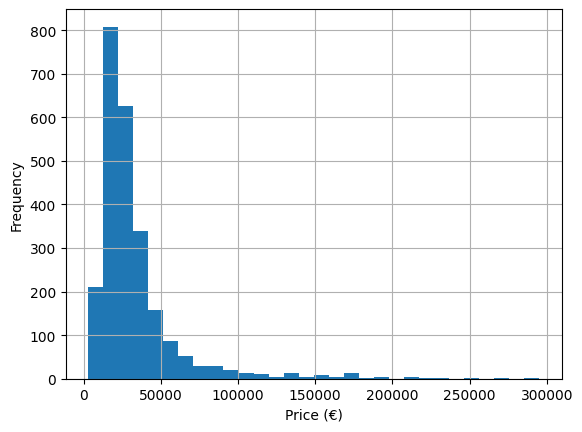

In [9]:
car['price'].hist(bins=30);
plt.xlabel('Price (€)')
plt.ylabel('Frequency');

On peut maintenant regarder par rapport à la date de la mise en circulation

In [10]:
car = car[~car['miseencirculation'].isna()]
car['miseencirculation'] = pd.to_datetime(car['miseencirculation'])
car['miseencirculation'] = car['miseencirculation'].dt.year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1972'),
  Text(1, 0, '2004'),
  Text(2, 0, '2006'),
  Text(3, 0, '2007'),
  Text(4, 0, '2008'),
  Text(5, 0, '2009'),
  Text(6, 0, '2010'),
  Text(7, 0, '2011'),
  Text(8, 0, '2012'),
  Text(9, 0, '2013'),
  Text(10, 0, '2014'),
  Text(11, 0, '2015'),
  Text(12, 0, '2016'),
  Text(13, 0, '2017'),
  Text(14, 0, '2018'),
  Text(15, 0, '2019'),
  Text(16, 0, '2020'),
  Text(17, 0, '2021'),
  Text(18, 0, '2022'),
  Text(19, 0, '2023')])

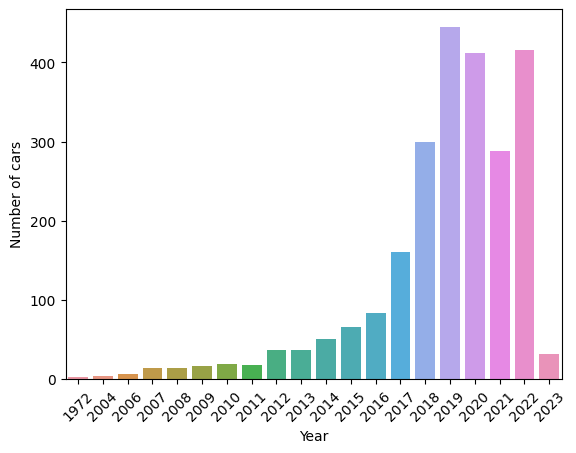

In [11]:
sns.barplot(x='index', y='miseencirculation', data=car['miseencirculation'].value_counts().reset_index().head(20));
plt.xlabel('Year')
plt.ylabel('Number of cars');
plt.xticks(rotation=45)

Jetons un coup d'oeil sur le kilometrage

In [12]:
car['kilometrage'] = car['kilométragecompteur'].str.extract(r'([0-9\s]+)')[0].str.replace(' ', '').astype('int')

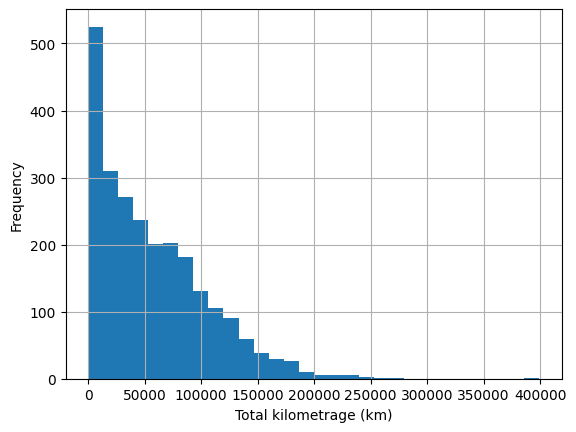

In [13]:
car['kilometrage'].hist(bins=30)
plt.xlabel('Total kilometrage (km)')
plt.ylabel('Frequency');

On peut regarder aussi le type du carburant

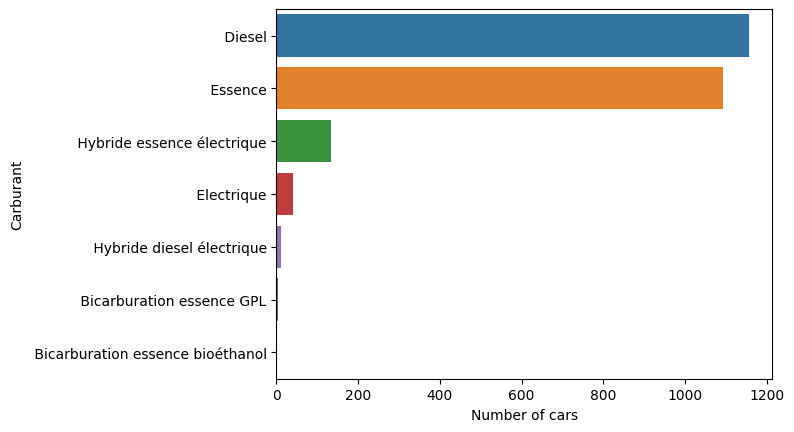

In [14]:
sns.barplot(x='énergie', y='index', data=car['énergie'].value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Carburant');

On remarque quelque carburant pas frequant

In [15]:
car = car[car['énergie'].str.strip().isin(['Essence', 'Diesel', 'Hybride essence électrique', 'Electrique'])]
car.loc[:, ('car_type')] = car['énergie']

On peut ragarder aussi la distribution des couleurs

In [16]:
car['color'] = car['couleurextérieure'].str.strip().str.lower()

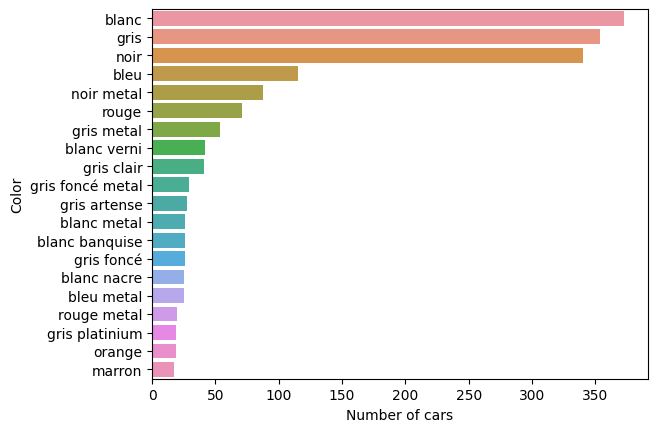

In [17]:
sns.barplot(x='color', y='index', data=car['color'].value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Color');

In [18]:
car = car[~car['nombredeportes'].isna()]
car['nombredeportes'] = car['nombredeportes'].astype('int')
car['nombredeplaces'] = car['nombredeplaces'].fillna(4).astype('int')
car['garantie'] = car['garantie'].fillna('0')
car['garantie'] = car['garantie'].str.extract(r"([0-9]+)")[0].astype("int")
car['premièremain(déclaratif)'] = car['premièremain(déclaratif)'].str.strip() == 'oui'
car = car[~car['puissancefiscale'].isna()]
car = car[~car['puissancedin'].isna()]
car['puissancefiscale'] = car['puissancefiscale'].str.strip().str.extract(r'([0-9]+)')[0].astype('int')
car['puissancedin'] = car['puissancedin'].str.extract(r"([0-9]+)")[0].astype('int')
car["crit'air"] = car["crit'air"].fillna(2).astype('str')


In [19]:
car.columns

Index(['publishedsince', 'carmodel', 'price', 'année', 'miseencirculation',
       'contrôletechnique', 'kilométragecompteur', 'énergie', 'boîtedevitesse',
       'couleurextérieure', 'nombredeportes', 'nombredeplaces', 'garantie',
       'premièremain(déclaratif)', 'nombredepropriétaires', 'puissancefiscale',
       'puissancedin', 'crit'air', 'émissionsdeco2', 'consommationmixte',
       'normeeuro', 'options', 'departement', 'id', 'waranty', 'vendeur',
       'vérifié&garanti', 'rechargeable', 'autonomiebatterie',
       'capacitébatterie', 'conso.batterie', 'couleurintérieure',
       'puissancemoteur', 'primeàlaconversion', 'garantieconstructeur',
       'provenance', 'prixinclutlabatterie', 'voltagebatterie',
       'intensitébatterie', 'prixinclutlabatterie.1', 'kilometrage',
       'car_type', 'color'],
      dtype='object')

In [20]:
columns = ['carmodel', 'price', 'année', 'miseencirculation', 'contrôletechnique', 'kilometrage', 'car_type', 'boîtedevitesse', 'color',
'nombredeportes', 'nombredeplaces', 'garantie', 'puissancefiscale', 'puissancedin', "crit'air"]
df = car[columns]


/tmp/ipykernel_53507/3982271074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


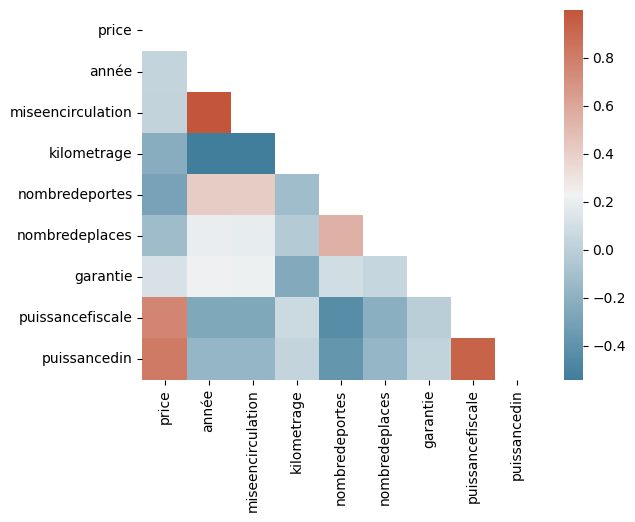

In [21]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap);

In [22]:
df.head()

,carmodel,price,année,miseencirculation,contrôletechnique,kilometrage,car_type,boîtedevitesse,color,nombredeportes,nombredeplaces,garantie,puissancefiscale,puissancedin,crit'air
0,RENAULT,11080,2020.0,2020,non requis,27297,Essence,mécanique,gris,5,4,12,5,90,1.0
1,BMW,50690,2019.0,2019,non requis,59778,Diesel,automatique,saphirschwarz,5,5,24,15,258,2.0
2,BMW,19740,2017.0,2017,requis,128835,Hybride essence électrique,automatique,gris metal,5,5,6,5,136,1.0
3,RENAULT,13890,2007.0,2007,requis,225334,Diesel,mécanique,gris f,4,9,6,9,135,3.0
4,CITROEN,16780,2020.0,2021,non requis,14218,Essence,mécanique,gris foncé,5,5,12,5,110,1.0


In [23]:
Y = df['price']
X = df[['carmodel','miseencirculation','kilometrage','boîtedevitesse','color','car_type','puissancedin']]

In [24]:
from sklearn.preprocessing import OrdinalEncoder
carmodel_column = X[['carmodel']]
boîtedevitesse_column = X[['boîtedevitesse']]
color_column = X[['color']]
car_type_column = X[['car_type']]


encoder = OrdinalEncoder()
carmodel_column = encoder.fit_transform(carmodel_column)
boîtedevitesse_column = encoder.fit_transform(boîtedevitesse_column)
color_column = encoder.fit_transform(color_column)
car_type_column = encoder.fit_transform(car_type_column)
X[['carmodel']] = carmodel_column 
X[['boîtedevitesse']] = boîtedevitesse_column 
X[['color']] = color_column 
X[['car_type']] = car_type_column

/tmp/ipykernel_53507/3657231500.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['carmodel']] = carmodel_column
/tmp/ipykernel_53507/3657231500.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['boîtedevitesse']] = boîtedevitesse_column
/tmp/ipykernel_53507/3657231500.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [25]:
X


,carmodel,miseencirculation,kilometrage,boîtedevitesse,color,car_type,puissancedin
0,34.0,2020,27297,1.0,144.0,2.0,90
1,5.0,2019,59778,0.0,359.0,0.0,258
2,5.0,2017,128835,0.0,186.0,3.0,136
3,34.0,2007,225334,1.0,171.0,0.0,135
4,8.0,2021,14218,1.0,173.0,2.0,110
...,...,...,...,...,...,...,...
2436,41.0,2019,29699,0.0,31.0,3.0,73
2437,33.0,2020,9523,0.0,354.0,2.0,450
2438,8.0,2023,1,1.0,31.0,2.0,110
2439,3.0,2017,61363,0.0,144.0,0.0,150


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)

In [27]:
from xgboost.sklearn import XGBRegressor

regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
predictions = regressor.predict(X_test)

In [29]:
mean_squared_error(predictions, Y_test)

179776255.7322857

In [33]:
r2_score(predictions, Y_test)

0.7473136235155027

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colonne = X[['kilometrage']]
colonne = scaler.fit_transform(colonne)

In [35]:
X[['kilometrage']] = colonne 

/tmp/ipykernel_53507/2437231758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['kilometrage']] = colonne


In [36]:
Y = scaler.fit_transform(df[['price']])

In [37]:
Y

array([[0.02759801],
       [0.16322548],
       [0.05725047],
       ...,
       [0.06961137],
       [0.06474919],
       [0.08974491]])

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)

In [39]:
len(X_test)

235

In [40]:
len(Y_test)

235

In [41]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
predictions = regressor.predict(X_test)
r2_score(predictions, Y_test)

0.7922807653593023

In [43]:

regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
r2_score(predictions, Y_test)

0.7922807653593023

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor()
gradient.fit(X_train, Y_train)
predictions = gradient.predict(X_test)
r2_score(predictions, Y_test)

/home/ivanb/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8084004019576294

In [48]:
import pickle

In [52]:
pickle.dump(gradient, open('model', 'wb'))
import joblib
joblib.dump(scaler, 'scaler.save') 

['scaler.save']

In [51]:
X_test

,carmodel,miseencirculation,kilometrage,boîtedevitesse,color,car_type,puissancedin
1451,34.0,2016,0.133091,0.0,31.0,1.0,59
692,15.0,2011,0.072980,1.0,88.0,2.0,540
2081,34.0,2018,0.205034,1.0,144.0,0.0,90
838,9.0,2022,0.033196,0.0,144.0,2.0,150
1979,5.0,2017,0.217337,0.0,269.0,0.0,150
...,...,...,...,...,...,...,...
297,43.0,2020,0.160300,0.0,144.0,0.0,150
1564,29.0,2019,0.067490,1.0,258.0,2.0,102
2307,43.0,2018,0.351262,0.0,52.0,3.0,320
2059,32.0,2018,0.225359,0.0,31.0,0.0,150
